In [ ]:
!nvidia-smi

Sat Dec  7 22:32:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   42C    P8              12W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!pip install -q -e .

/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 463, done.
remote: Counting objects: 100% (240/240), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 463 (delta 175), reused 135 (delta 135), pack-reused 223 (from 1)
Receiving objects: 100% (463/463), 12.87 MiB | 18.21 MiB/s, done.
Resolving deltas: 100% (241/241), done.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 19.9 MB/s eta 0:00:00


In [ ]:
import os

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [ ]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content
/content/weights


In [ ]:
import os

WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

/content/weights/groundingdino_swint_ogc.pth ; exist: True


In [ ]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate

grounding_dino_model = load_model(CONFIG_PATH, WEIGHTS_PATH)

/content/GroundingDINO
final text_encoder_type: bert-base-uncased


tensor([[0.5000, 0.4997, 0.9996, 0.9988],
        [0.4846, 0.3471, 0.2905, 0.4356]])
tensor([0.4600, 0.4029])
['lesion', 'lesion']
selected_box
tensor([0.4846, 0.3471, 0.2905, 0.4356])
selected_box_coords
[203.59473   58.209938 377.90396  254.20883 ]
image_height, image_width
450 600


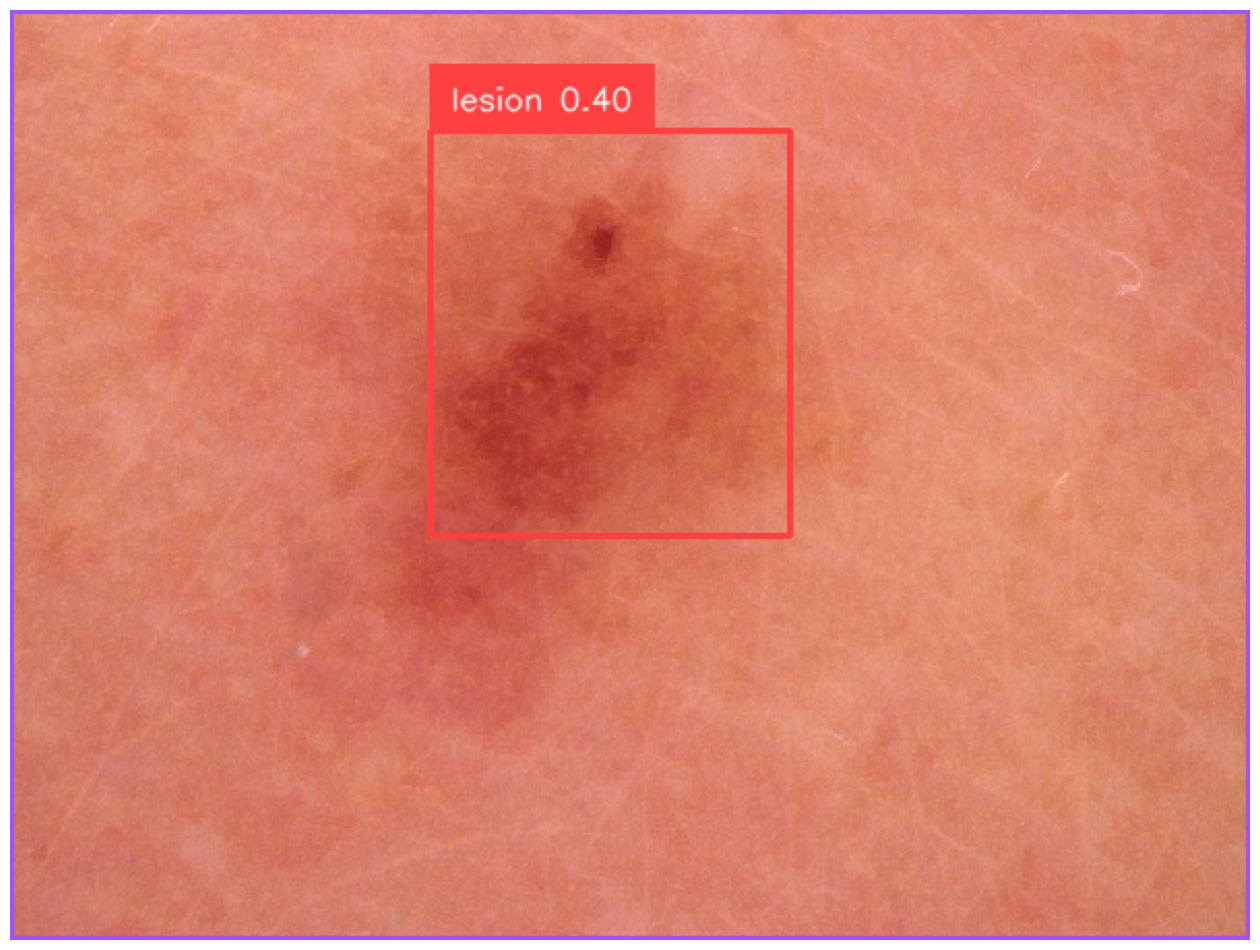

In [ ]:
import os
import supervision as sv
import numpy as np

IMAGE_NAME = "/content/ISIC_0027944.jpg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

TEXT_PROMPT = "lesion"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=grounding_dino_model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)
print(boxes)
print(logits)
print(phrases)
image_height, image_width = image_source.shape[:2]

areas = boxes[:,2] * boxes[:,3]
smallest_index = np.argmin(areas)
selected_box = boxes[smallest_index]
print("selected_box")
print(selected_box)
selected_box_coords = np.zeros_like(selected_box)
# Calculate top-left and bottom-right pixel coordinates
selected_box_coords[0] = (selected_box[0] - selected_box[2]/2)*image_width
selected_box_coords[1] = (selected_box[1] - selected_box[3]/2)*image_height
selected_box_coords[2] = (selected_box[0] + selected_box[2]/2)*image_width
selected_box_coords[3] = (selected_box[1] + selected_box[3]/2)*image_height
print("selected_box_coords")
print(selected_box_coords)

'''
pixel_boxes_new = np.zeros_like(pixel_boxes)
# Calculate top-left and bottom-right pixel coordinates
pixel_boxes_new[:,0] = pixel_boxes[:,0] - pixel_boxes[:,2]/2
pixel_boxes_new[:,1] = pixel_boxes[:,1] - pixel_boxes[:,3]/2
pixel_boxes_new[:,2] = pixel_boxes[:,0] + pixel_boxes[:,2]/2
pixel_boxes_new[:,3] = pixel_boxes[:,1] + pixel_boxes[:,3]/2
print(pixel_boxes_new)
print(pixel_boxes_new[smallest_index])
'''


print("image_height, image_width")
print(image_height, image_width)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install supervision
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-rvb1ayct
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-rvb1ayct
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=ee4c50fa137da216b4cd1aa5335e5c6660a934d2aa88b5c078226282fda291e3
  Stored in directory: /tmp/pip-ephem-wheel-cache-34rwbuby/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment_anything


In [ ]:
#from segment_anything import sam_model_registry
# Initialize SAM model
import torch
import cv2
import supervision as sv
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(DEVICE)
MODEL_TYPE = ["vit_h","vit_l","vit_b"]
CHECKPOINT_PATH =["./sam_vit_h_4b8939.pth","sam_vit_l_0b3195.pth","sam_vit_b_01ec64.pth"]

model = "vit_b"
if model =='vit_h':
  CHECKPOINT_PATH = f"./sam_{model}_4b8939.pth"
elif model =='vit_l':
  CHECKPOINT_PATH = f"./sam_{model}_0b3195.pth"
else:
  CHECKPOINT_PATH = f"./sam_{model}_01ec64.pth"

sam = sam_model_registry[model](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

cuda:0


In [ ]:
from scipy.ndimage import label
import matplotlib.pyplot as plt

def retain_largest_connected_region(mask):
    # Label connected regions in the mask
    labeled_mask, num_features = label(mask)
    if num_features == 0:
        return mask  # Return the original mask if no connected regions are found

    # Find the largest connected component
    largest_component = max(range(1, num_features + 1), key=lambda x: np.sum(labeled_mask == x))

    # Create a binary mask for the largest connected component
    largest_connected_region = (labeled_mask == largest_component)
    return largest_connected_region

[203.59473   58.209938 581.49866  312.41876 ]
masks shape: (3, 450, 600)
(450, 600)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


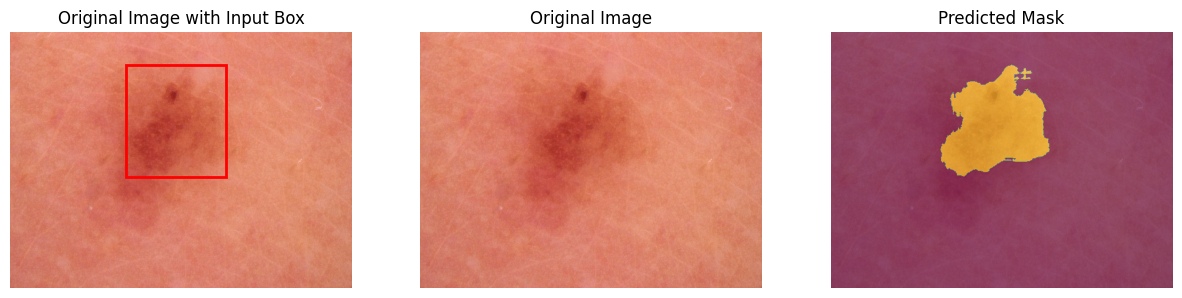

In [ ]:
import torch
import numpy as np
from pycocotools.coco import COCO
from PIL import Image
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor
import random
from matplotlib.patches import Rectangle



images_path="/content"

random_image="ISIC_0027944.jpg"
image_path = f"{images_path}/{random_image}"
image = np.array(Image.open(image_path).convert("RGB"))

predictor = SamPredictor(sam)
#predictor = SamPredictor(sam)

# Set the image in the predictor
predictor.set_image(image)

bbox = selected_box_coords
input_box = np.array([bbox[0], bbox[1], bbox[0] + bbox[2], bbox[1] + bbox[3]])
print(input_box)
#input_box = np.array([203.61, 58.19, 377.91, 254.21])
input_label = "lesion"
input_box=np.array(selected_box_coords)

masks, _, _ = predictor.predict(
  point_coords=None,
  point_labels=None,
  #box=None,
  box=input_box,
  multimask_output=True,
)
print("masks shape:", masks.shape)

# Find the largest mask
largest_mask = masks[np.argmax([np.sum(mask) for mask in masks])]
largest_mask = retain_largest_connected_region(largest_mask)
print(largest_mask.shape)
print(largest_mask)
plt.figure(figsize=(15, 5))

# Original Image with Input Box
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original Image with Input Box")
plt.axis('off')

# Draw the input box
rect = Rectangle((input_box[0], input_box[1]),
                 input_box[2] - input_box[0],
                 input_box[3] - input_box[1],
                 linewidth=2, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)

plt.subplot(1, 3, 2)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(image)
#plt.imshow(masks[0], alpha=0.5)
plt.imshow(largest_mask, alpha=0.5)  # Overlay the largest predicted mask
plt.title(f"Predicted Mask")
plt.axis('off')
plt.show()

In [ ]:
def process_image(image_path, path_to_save_file, show_plots=True, print_logs=True):
    import os
    import supervision as sv
    import numpy as np
    import torch
    from PIL import Image
    import matplotlib.pyplot as plt
    from segment_anything import sam_model_registry, SamPredictor
    from matplotlib.patches import Rectangle

    # Constants
    TEXT_PROMPT = "lesion"
    BOX_THRESHOLD = 0.35
    TEXT_THRESHOLD = 0.25

    # Load image
    image_source, image = load_image(image_path)
    image_height, image_width = image_source.shape[:2]

    # Predict boxes
    boxes, logits, phrases = predict(
        model=grounding_dino_model,
        image=image,
        caption=TEXT_PROMPT,
        box_threshold=BOX_THRESHOLD,
        text_threshold=TEXT_THRESHOLD
    )
    if print_logs:
        print(boxes)

    # Select smallest box
    areas = boxes[:, 2] * boxes[:, 3]
    smallest_index = np.argmin(areas)
    selected_box = boxes[smallest_index]
    if print_logs:
        print(selected_box)

    # Calculate box coordinates
    selected_box_coords = np.zeros_like(selected_box)
    selected_box_coords[0] = (selected_box[0] - selected_box[2]/2) * image_width
    selected_box_coords[1] = (selected_box[1] - selected_box[3]/2) * image_height
    selected_box_coords[2] = (selected_box[0] + selected_box[2]/2) * image_width
    selected_box_coords[3] = (selected_box[1] + selected_box[3]/2) * image_height
    if print_logs:
        print("selected_box_coords")
        print(selected_box_coords)

    # Annotate frame
    annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

    if show_plots:
        sv.plot_image(annotated_frame, (4, 4))

    # SAM prediction
    predictor = SamPredictor(sam)
    predictor.set_image(np.array(Image.open(image_path).convert("RGB")))

    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=(selected_box_coords),
        multimask_output=True,
    )

    # Find largest mask
    largest_mask = masks[np.argmax([np.sum(mask) for mask in masks])]
    largest_mask = retain_largest_connected_region(largest_mask)

    if show_plots:
        # Plotting
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

        ax1.imshow(image_source)
        ax1.add_patch(Rectangle((selected_box_coords[0], selected_box_coords[1]),
                                selected_box_coords[2] - selected_box_coords[0],
                                selected_box_coords[3] - selected_box_coords[1],
                                linewidth=2, edgecolor='r', facecolor='none'))
        ax1.set_title("Original Image with Input Box")
        ax1.axis('off')

        ax2.imshow(image_source)
        ax2.set_title("Original Image")
        ax2.axis('off')

        ax3.imshow(image_source)
        ax3.imshow(largest_mask, alpha=0.5)
        ax3.set_title("Predicted Mask")
        ax3.axis('off')

        plt.show()

    # Create binary mask
    binary_mask = (largest_mask > 0).astype(np.uint8) * 255

    # Apply mask to original image
    masked_image_array = image_source * (binary_mask[:, :, None] // 255)

    # Convert to PIL Image and save
    masked_image = Image.fromarray(masked_image_array.astype(np.uint8))
    masked_image.save(path_to_save_file)

    if print_logs:
        print(f"Masked portion of the image saved as '{path_to_save_file}'")

# Usage example:
process_image("/content/ISIC_0027944.jpg", "masked_image.png", show_plots=False, print_logs=False)

In [ ]:
!pwd

/content/GroundingDINO


In [ ]:
boxes

tensor([[0.5000, 0.4997, 0.9996, 0.9988],
        [0.4846, 0.3471, 0.2905, 0.4356]])